#### Formula for LCG:

$$
X_{k+1} = (a \cdot X_k + c) \mod m
$$

In [20]:
import matplotlib.pyplot as plt
import math
import numpy as np

In [2]:
class LCG:
    def __init__(self, seed=0):
        self.m = 2**31 - 1
        self.a = 16807
        self.c = 0
        self.state = seed % self.m # this is the current variable of Xk
    
    def rand01(self):
        self.state = (self.a * self.state + self.c) % self.m
        ## return in the range of [0, 1)
        return self.state / self.m
    
    def uniform(self, upper, lower):
        ## scale to [lower, upper)
        return lower + (upper - lower) * self.rand01()
    
    def normal(self, mu, sigma):
        u1 = self.rand01()
        u2 = self.rand01()

        z0 = math.sqrt(-2 * math.log(u1)) * math.cos(2 * math.pi * u2)
        # z1 = math.sqrt(-2 * math.log(u1)) * math.sin(2 * math.pi * u2)

        ## scale to a general normal distribution with a given mu and sigma
        x = mu + z0 * sigma
        return x

#### Generate and plot random numbers within a range which resemble the uniform distribution

In [3]:
n = 1000
upper, lower = 5.0, 100.0

(array([ 89.,  92., 100.,  97.,  89., 114., 111., 100.,  97., 111.]),
 array([ 5.15075631, 14.63255795, 24.1143596 , 33.59616125, 43.0779629 ,
        52.55976455, 62.04156619, 71.52336784, 81.00516949, 90.48697114,
        99.96877279]),
 <BarContainer object of 10 artists>)

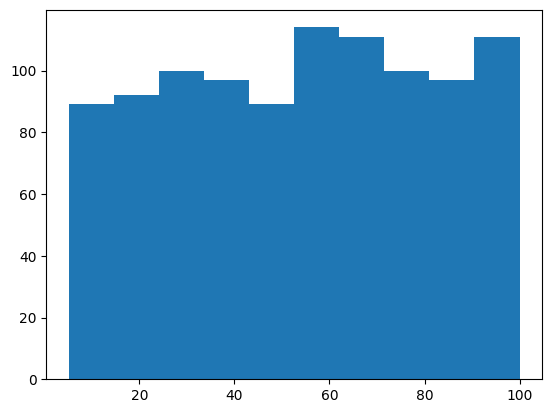

In [4]:
rng = LCG(seed=42)
data = [rng.uniform(upper, lower) for _ in range(n)]
## plot a histogram

plt.hist(data, bins=10)

#### Generate and plot random numbers with a given mean and standard deviation from a normal distribution

In [11]:
mu = 0
sigma = 1
normal_data = [rng.normal(mu, sigma) for _ in range(n)]

(array([  6.,  37.,  83., 179., 258., 240., 124.,  50.,  20.,   3.]),
 array([-2.95186341, -2.32535095, -1.69883848, -1.07232602, -0.44581356,
         0.18069891,  0.80721137,  1.43372383,  2.06023629,  2.68674876,
         3.31326122]),
 <BarContainer object of 10 artists>)

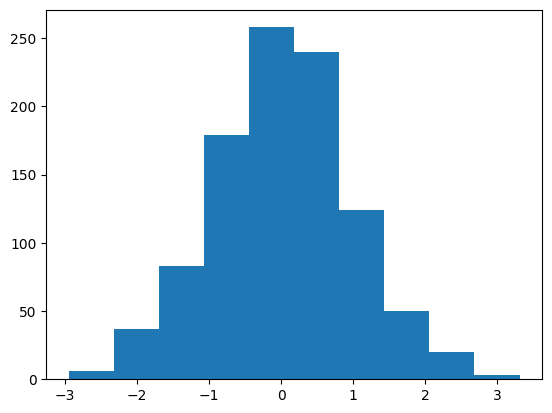

In [12]:
plt.hist(normal_data, bins=10)

In [19]:
round(np.mean(normal_data)), round(np.std(normal_data))

(0, 1)